# PortfolioAnalyser overview

PortfolioAnalyser is designed to run various portfolio analyses based on a discretionary stock portfolio. The outputs can be python-based, ideal for a Jupyter Notebook, or Excel-based.


Constituents data can be registered through Inputs/portfolio.xlsx


Further parameters, such as the date range considered, and the portfolio benchmark can be passed through the params input.

## Setup

### Imports

In [1]:
from os import path, getcwd
from pathlib import Path
from pandas import read_excel
from Utils.Portfolio.Portfolio import PortfolioAnalysis

### Create absolute paths for input and output folders to ensure stability

In [2]:
path_input = Path(path.join(getcwd(), "Input"))
path_output = Path(path.join(getcwd(), "Output"))

### Read portfolio constituents to df

In [3]:
df_portfolio = read_excel(path.join(path_input, "portfolio.xlsx"), index_col=0)

### Create base params for PortfolioAnalyser

In [4]:
base_params = {
    "start_date": "2023-01-01",
    "end_date": "2023-12-01",
    "benchmark": "^SPX",
    "path_input": path_input,
    "path_output": path_output,
}

## PortfolioAnalyser

### Initialise PortfolioAnalyser

In [5]:
PortfolioAnalyser = PortfolioAnalysis(df_portfolio, base_params)

2023-12-21 15:36:24.881435 - initialising class PortfolioAnalysis
2023-12-21 15:36:24.884891 - fetching portfolio data


### Run desired functions

#### Get constituent stats overview

In [6]:
PortfolioAnalyser.get_constituents_stats()

,weight,total_return,relative_return,volatility_annualised,beta
AAPL,0.166667,0.527239,0.278597,0.204276,1.135231
MSFT,0.166667,0.595583,0.335814,0.258321,1.231812
NESN.SW,0.166667,-0.064124,-0.216489,0.150053,0.100673
NOVN.SW,0.166667,0.093320,-0.084678,0.181512,0.073534
ABBN.SW,0.166667,0.242767,0.040439,0.217557,0.494556
UBSG.SW,0.166667,0.424713,0.192763,0.306053,0.835358


#### Get sector allocation

In [7]:
PortfolioAnalyser.get_sector_allocation()

sector
Technology            0.333333
Consumer Defensive    0.166667
Financial Services    0.166667
Healthcare            0.166667
Industrials           0.166667
Name: weight, dtype: float64

#### Get country allocation

In [8]:
PortfolioAnalyser.get_country_allocation()

country
Switzerland      0.666667
United States    0.333333
Name: weight, dtype: float64

#### Create Excel output

In [9]:
PortfolioAnalyser.create_xlsx_output()

2023-12-21 15:36:26.908175 - Portfolio output saved here: /Users/user/Library/Mobile Documents/com~apple~CloudDocs/HSG/02_Bachelor/Semester_1/skills_programming/unisg-programming-project-hs23/Output/portfolio_overview.xlsx


#### Get daily return overview

In [10]:
PortfolioAnalyser.get_return_overview_daily()

,portfolio_return,benchmark_return
2023-01-02,0.000000,0.000000
2023-01-03,0.000000,0.000000
2023-01-04,0.006613,0.007539
2023-01-05,-0.008637,-0.011646
2023-01-06,0.012950,0.022841
...,...,...
2023-11-27,-0.004960,-0.001954
2023-11-28,0.000962,0.000980
2023-11-29,0.002171,-0.000946
2023-11-30,0.009579,0.003784


#### Get cumulative return overview

In [11]:
PortfolioAnalyser.get_return_overview_cumulative()

,portfolio_return,benchmark_return
2023-01-02,0.000000,0.000000
2023-01-03,0.000000,0.000000
2023-01-04,0.006613,0.007539
2023-01-05,-0.002081,-0.004194
2023-01-06,0.010842,0.018551
...,...,...
2023-11-27,0.285408,0.189923
2023-11-28,0.286644,0.191089
2023-11-29,0.289437,0.189962
2023-11-30,0.301788,0.194465


### Get daily relative returns

In [12]:
PortfolioAnalyser.get_relative_returns_daily()

2023-01-02    0.000000
2023-01-03    0.000000
2023-01-04   -0.000919
2023-01-05    0.003044
2023-01-06   -0.009670
                ...   
2023-11-27   -0.003012
2023-11-28   -0.000018
2023-11-29    0.003120
2023-11-30    0.005773
2023-12-01    0.000000
Name: relative_return, Length: 240, dtype: float64

### Plot daily constituent returns

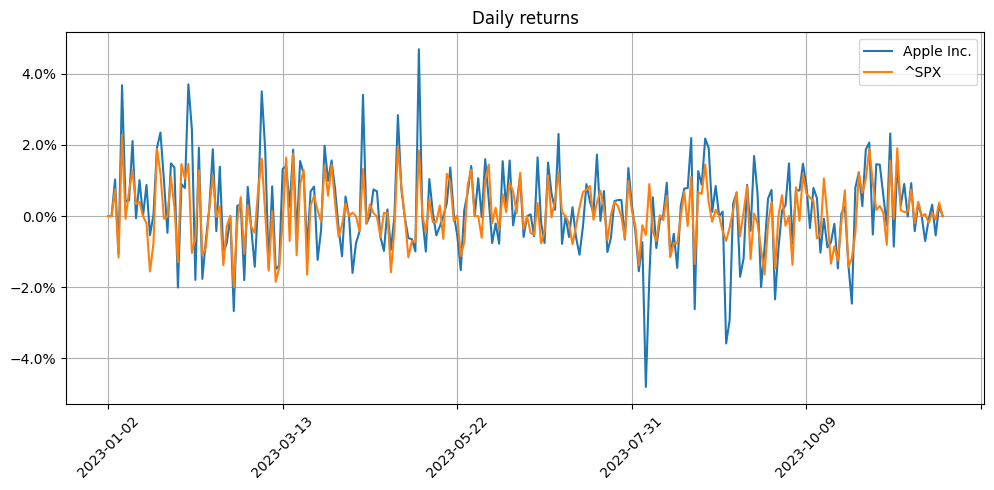

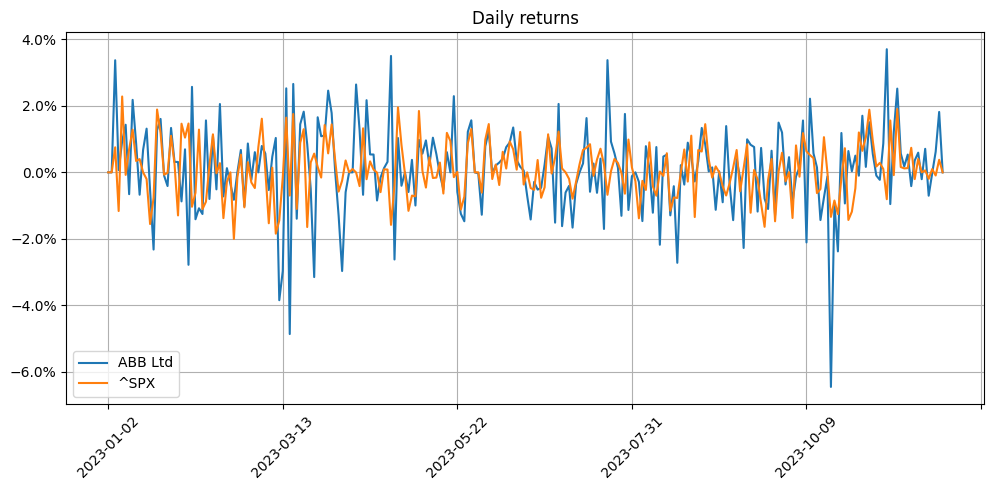

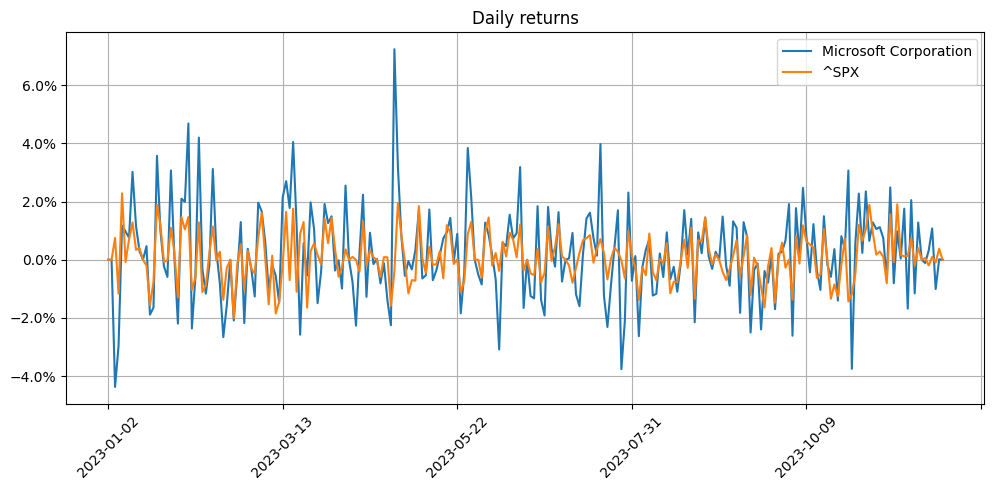

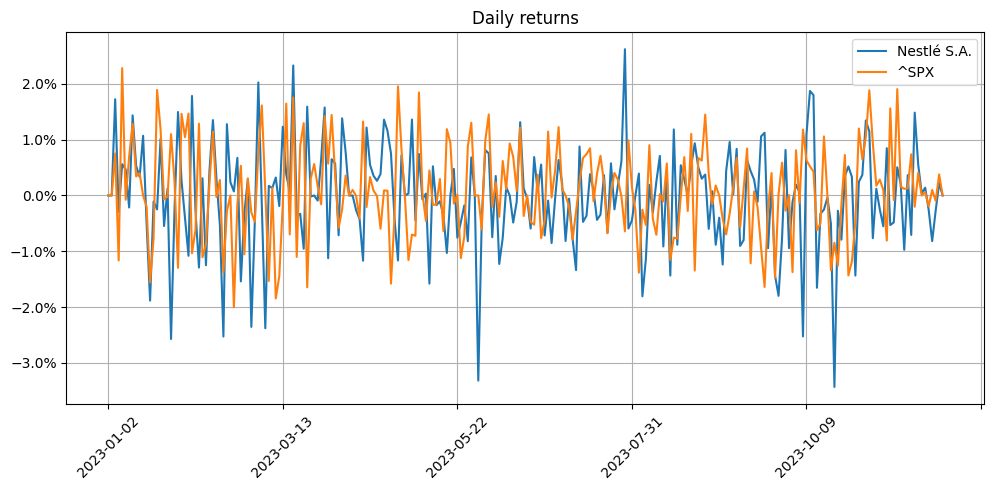

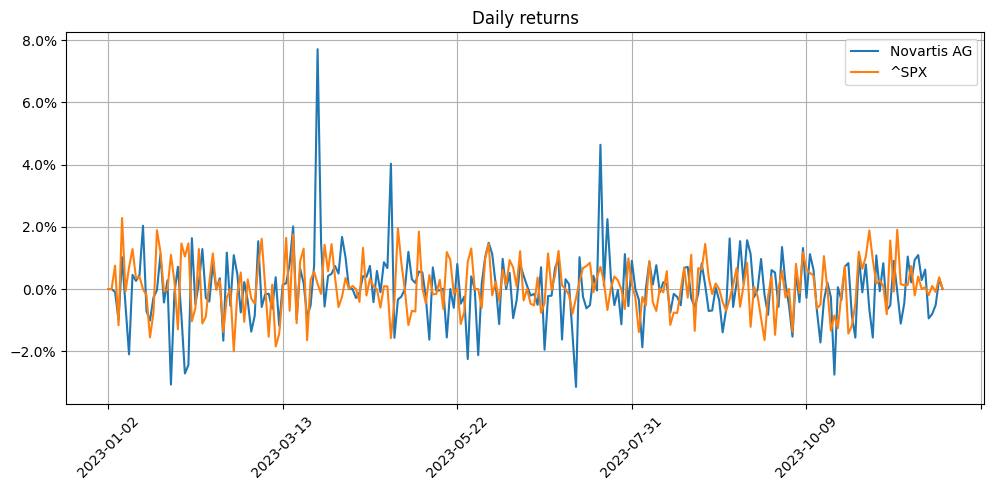

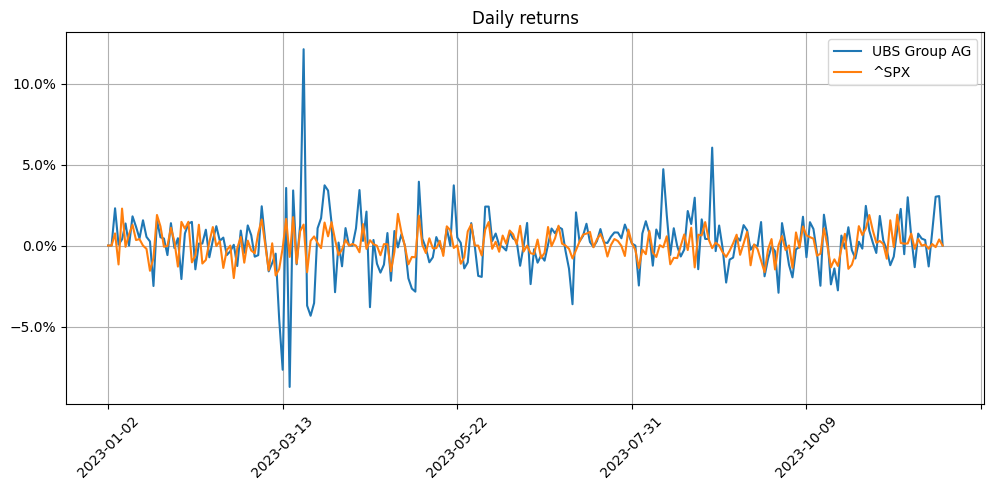

In [14]:
PortfolioAnalyser.plot_returns_daily(include_benchmark=True)

### Plot cumulative constituent returns

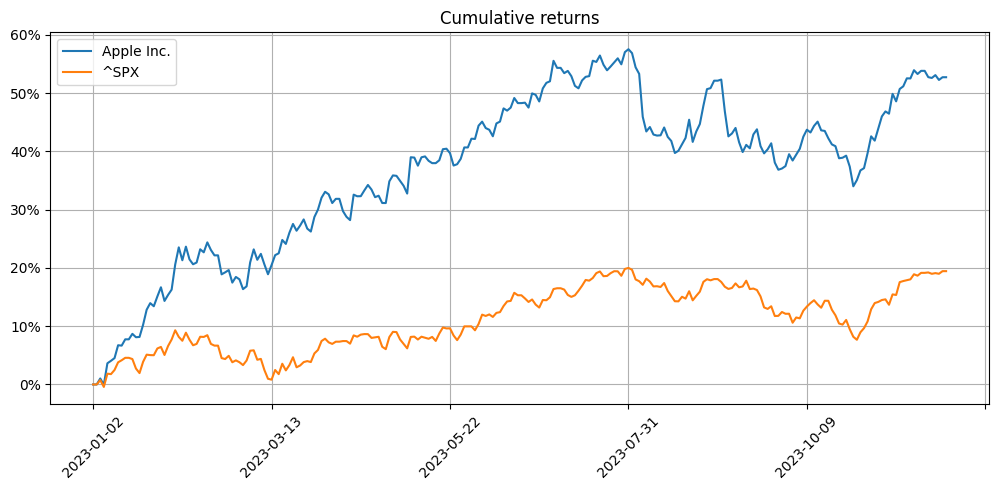

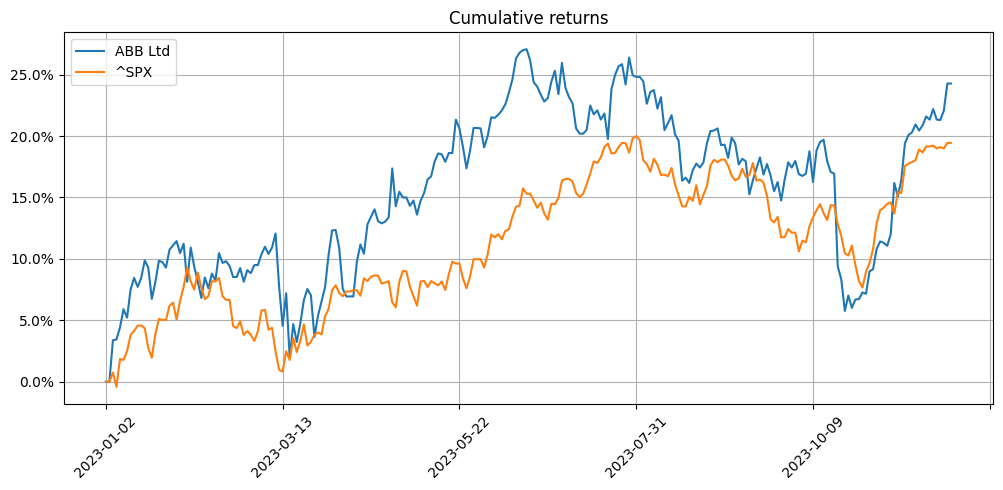

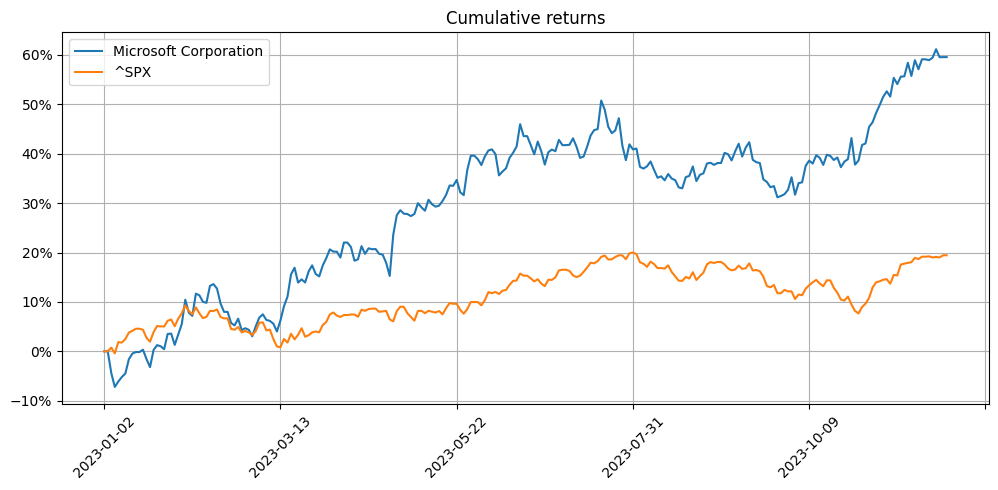

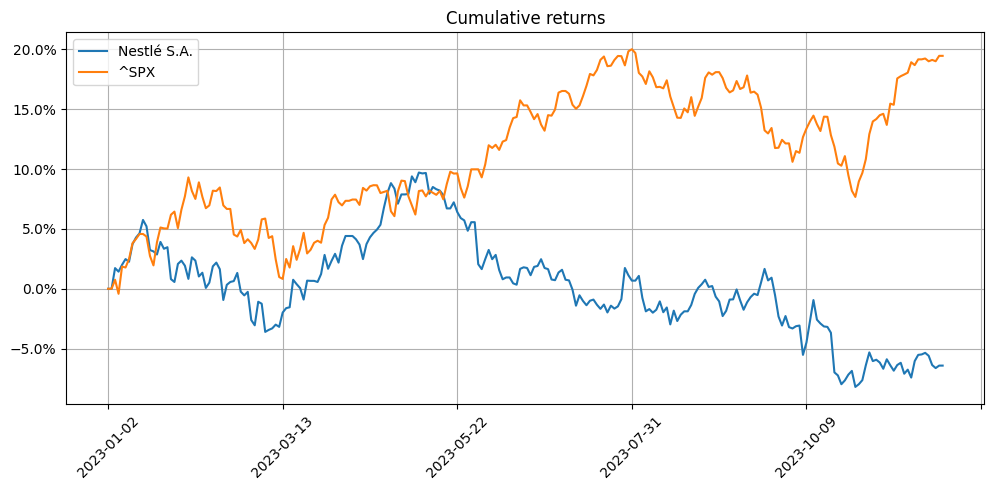

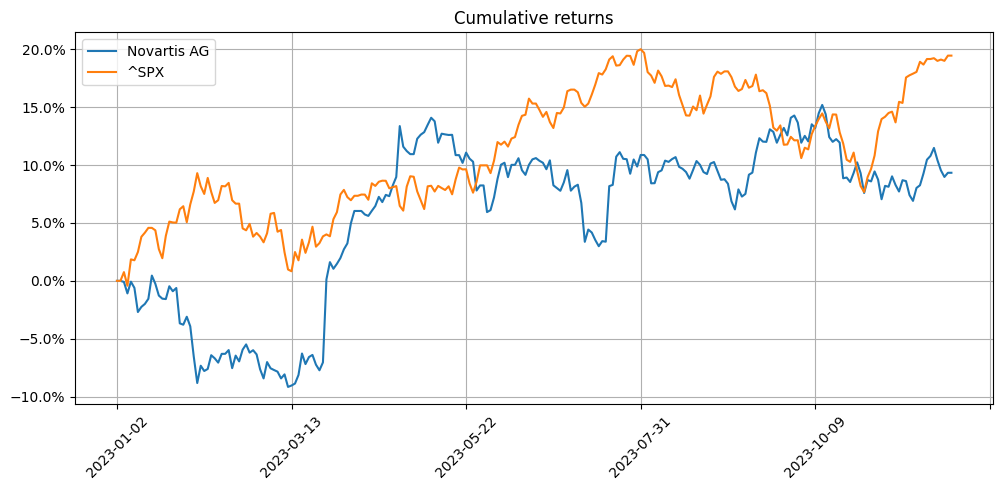

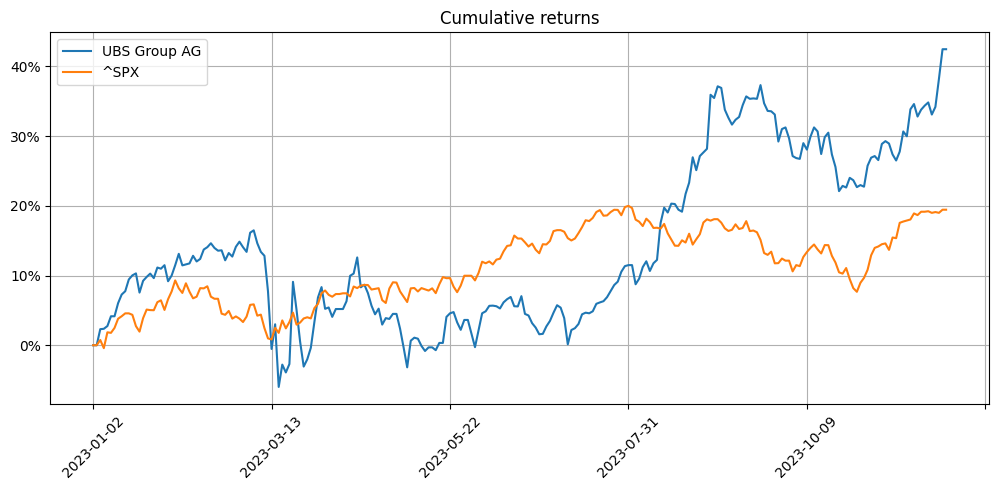

In [15]:
PortfolioAnalyser.plot_returns_cumulative(include_benchmark=True)